## Import Statements / Load Data

In [2]:
import pandas as pd
import numpy as np

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.collocations import *
import string
from textblob import TextBlob
from nltk import tokenize
from nltk.corpus import stopwords, gutenberg
from wordcloud import WordCloud
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import seaborn as sns

#nltk.download("stopwords")

In [3]:
df = pd.read_csv('jamaican_news.csv')
df.head()

,Company,Date,Link,Title,Text
0,Sagicor,01/28,https://jamaica.loopnews.com/content/registrat...,Registration closes February 1 for Sagicor Sig...,Registration for the Sagicor Sigma 25th Legacy...
1,Sagicor,01/26,https://jamaica.loopnews.com/content/sagicor-f...,Sagicor Financial announces retirement of Dodr...,Sagicor Financial Company has announced that D...
2,Sagicor,12/14/2022,https://jamaica.loopnews.com/content/former-sa...,Former Sagicor VP slapped with fraud-related c...,Former vice president of group marketing at Sa...
3,Sagicor,NaN,https://jamaica.loopnews.com/content/sagicor-l...,Sagicor launches Community Heroes Awards,Nominations for the Sagicor Foundation biennia...
4,Sagicor,09/18/2022,https://jamaica.loopnews.com/content/sagicor-r...,Sagicor reorganises senior management structure,Sagicor Group Jamaica has announced changes to...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  23 non-null     object
 1   Date     22 non-null     object
 2   Link     23 non-null     object
 3   Title    23 non-null     object
 4   Text     23 non-null     object
dtypes: object(5)
memory usage: 1.0+ KB


## Clean Data

In [5]:
print(df['Link'][0]) # date is 2023
print(df['Link'][1]) # page not found - one 'r' in miller and also 2023
print(df['Link'][3])

df['Link'][1] = 'https://jamaica.loopnews.com/content/sagicor-financial-announces-retirement-dodridge-miller'
df['Date'][1] = '01/26/2023'
df['Date'][0] = '01/28/2023'
df['Date'][3] = '09/26/2022'

https://jamaica.loopnews.com/content/registration-closes-february-1-sagicor-sigma-25th-legacy-run
https://jamaica.loopnews.com/content/sagicor-financial-announces-retirement-dodridge-millerr
https://jamaica.loopnews.com/content/sagicor-launches-community-heroes-awards


In [6]:
df.head()

,Company,Date,Link,Title,Text
0,Sagicor,01/28/2023,https://jamaica.loopnews.com/content/registrat...,Registration closes February 1 for Sagicor Sig...,Registration for the Sagicor Sigma 25th Legacy...
1,Sagicor,01/26/2023,https://jamaica.loopnews.com/content/sagicor-f...,Sagicor Financial announces retirement of Dodr...,Sagicor Financial Company has announced that D...
2,Sagicor,12/14/2022,https://jamaica.loopnews.com/content/former-sa...,Former Sagicor VP slapped with fraud-related c...,Former vice president of group marketing at Sa...
3,Sagicor,09/26/2022,https://jamaica.loopnews.com/content/sagicor-l...,Sagicor launches Community Heroes Awards,Nominations for the Sagicor Foundation biennia...
4,Sagicor,09/18/2022,https://jamaica.loopnews.com/content/sagicor-r...,Sagicor reorganises senior management structure,Sagicor Group Jamaica has announced changes to...


In [7]:
set(df.Company)

{'Barita', 'GraceKennedy', 'Sagicor'}

In [8]:
set(df.Date) #looks good

{'01/05/2022',
 '01/22/2023',
 '01/26/2023',
 '01/28/2023',
 '02/16/2021',
 '03/02/2022',
 '03/24/2022',
 '05/11/2022',
 '05/20/2022',
 '07/08/2022',
 '08/16/2022',
 '09/06/2022',
 '09/18/2022',
 '09/25/2020',
 '09/26/2022',
 '09/27/2022',
 '10/08/2021',
 '11/04/2022',
 '11/11/2022',
 '11/28/2022',
 '12/02/2022',
 '12/14/2022',
 '12/25/2020'}

In [9]:
df.Text = [txt.lower().strip() for txt in df.Text]
df.Title = [txt.lower().strip() for txt in df.Title]
df.head()

,Company,Date,Link,Title,Text
0,Sagicor,01/28/2023,https://jamaica.loopnews.com/content/registrat...,registration closes february 1 for sagicor sig...,registration for the sagicor sigma 25th legacy...
1,Sagicor,01/26/2023,https://jamaica.loopnews.com/content/sagicor-f...,sagicor financial announces retirement of dodr...,sagicor financial company has announced that d...
2,Sagicor,12/14/2022,https://jamaica.loopnews.com/content/former-sa...,former sagicor vp slapped with fraud-related c...,former vice president of group marketing at sa...
3,Sagicor,09/26/2022,https://jamaica.loopnews.com/content/sagicor-l...,sagicor launches community heroes awards,nominations for the sagicor foundation biennia...
4,Sagicor,09/18/2022,https://jamaica.loopnews.com/content/sagicor-r...,sagicor reorganises senior management structure,sagicor group jamaica has announced changes to...


In [10]:
df.Date = [pd.to_datetime(day) for day in df.Date]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Company  23 non-null     object        
 1   Date     23 non-null     datetime64[ns]
 2   Link     23 non-null     object        
 3   Title    23 non-null     object        
 4   Text     23 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.0+ KB


## Sentiment Analysis

0.07731921812014703
0.08420217209690894
0.058677669704949094


1.1

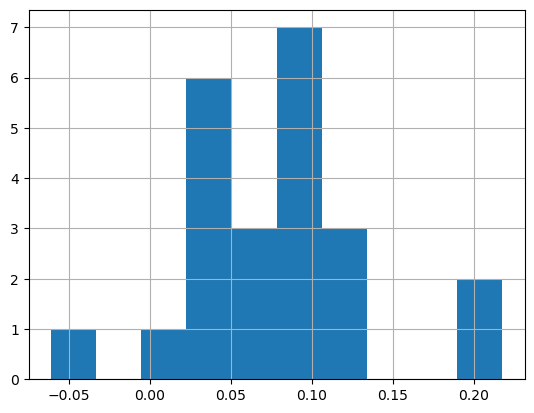

In [11]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['Polarity'] = df['Text'].apply(get_polarity)

df['Polarity'].hist()
print(df['Polarity'].mean())
print(df['Polarity'].median()) 
print(df['Polarity'].std())

0.8+0.3

In [12]:
df['Sentiment_Type'] = ''
df.loc[df.Polarity>0.09,'Sentiment_Type'] = 'POSITIVE'
df.loc[(df.Polarity>=0.05) & (df.Polarity<=0.09), 'Sentiment_Type'] = 'NEUTRAL'
df.loc[df.Polarity<0.05,'Sentiment_Type'] = 'NEGATIVE'

<AxesSubplot: title={'center': 'Sentiment Analysis'}>

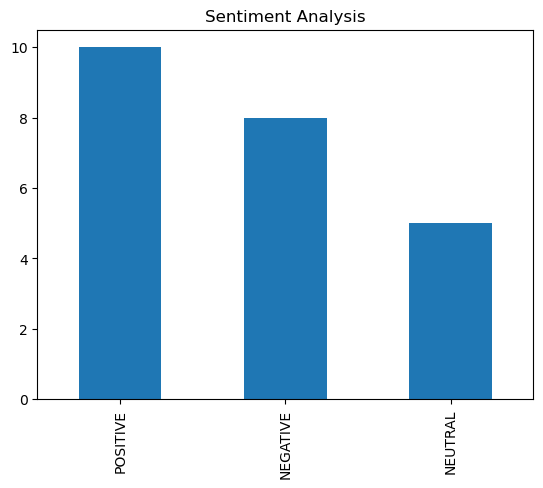

In [13]:
# Articles are overly positive - may be worth adjusting polarity level
# for categorization

df.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")

In [14]:
# inspecting negative article
df[df.Sentiment_Type=='NEGATIVE']

,Company,Date,Link,Title,Text,Polarity,Sentiment_Type
7,GraceKennedy,2022-12-02,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy goes solar,the new hi-lo food stores (hi-lo) location in ...,0.041599,NEGATIVE
10,GraceKennedy,2022-11-04,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy partners with ding dong for finan...,gracekennedy financial group (gkfg) has launch...,0.035930,NEGATIVE
12,GraceKennedy,2022-03-24,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy foundation to offer digital schol...,gracekennedy financial group (gkfg) has launch...,0.035930,NEGATIVE
15,Barita,2023-01-22,https://jamaica.loopnews.com/content/barita-as...,barita assures clients security of their inves...,"leading investment and brokerage firm, barita ...",0.029663,NEGATIVE
16,Barita,2022-09-06,https://jamaica.loopnews.com/content/barita-co...,barita concludes massive land purchase in st ann,barita investments limited has inked a deal wi...,0.011593,NEGATIVE
20,Barita,2021-02-16,https://jamaica.loopnews.com/content/barita-de...,barita deploying its capital with ‘extreme cau...,following a successful additional public offer...,0.046406,NEGATIVE
21,Barita,2020-12-25,https://jamaica.loopnews.com/content/barita-al...,barita almost doubles market capitalisation,"barita investments limited (bil), which had a ...",-0.060897,NEGATIVE
22,Barita,2020-09-25,https://jamaica.loopnews.com/content/barita-sh...,barita shares rocket,investors traded shares in barita investments ...,0.029924,NEGATIVE


In [15]:
# tokenizing with regex tokenizer
basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)

# Create new column with tokenized data
df["text_tokenized"] = df["Text"].apply(tokenizer.tokenize)

In [16]:
df

,Company,Date,Link,Title,Text,Polarity,Sentiment_Type,text_tokenized
0,Sagicor,2023-01-28,https://jamaica.loopnews.com/content/registrat...,registration closes february 1 for sagicor sig...,registration for the sagicor sigma 25th legacy...,0.057283,NEUTRAL,"[registration, for, the, sagicor, sigma, 25th,..."
1,Sagicor,2023-01-26,https://jamaica.loopnews.com/content/sagicor-f...,sagicor financial announces retirement of dodr...,sagicor financial company has announced that d...,0.217361,POSITIVE,"[sagicor, financial, company, has, announced, ..."
2,Sagicor,2022-12-14,https://jamaica.loopnews.com/content/former-sa...,former sagicor vp slapped with fraud-related c...,former vice president of group marketing at sa...,0.098864,POSITIVE,"[former, vice, president, of, group, marketing..."
3,Sagicor,2022-09-26,https://jamaica.loopnews.com/content/sagicor-l...,sagicor launches community heroes awards,nominations for the sagicor foundation biennia...,0.203968,POSITIVE,"[nominations, for, the, sagicor, foundation, b..."
4,Sagicor,2022-09-18,https://jamaica.loopnews.com/content/sagicor-r...,sagicor reorganises senior management structure,sagicor group jamaica has announced changes to...,0.117378,POSITIVE,"[sagicor, group, jamaica, has, announced, chan..."
5,Sagicor,2022-08-16,https://jamaica.loopnews.com/content/sagicor-n...,sagicor now holds client portfolio of alliance...,"sagicor group says its subsidiary, sagicor inv...",0.093899,POSITIVE,"[sagicor, group, says, its, subsidiary, sagico..."
6,Sagicor,2022-05-11,https://jamaica.loopnews.com/content/sagicors-...,sagicor's q1 earnings up 31%,large insurance provider sagicor group jamaica...,0.068849,NEUTRAL,"[large, insurance, provider, sagicor, group, j..."
7,GraceKennedy,2022-12-02,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy goes solar,the new hi-lo food stores (hi-lo) location in ...,0.041599,NEGATIVE,"[the, new, hi, lo, food, stores, hi, lo, locat..."
8,GraceKennedy,2022-11-28,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy surpasses $100b revenue target se...,the gracekennedy group has posted revenues of ...,0.084202,NEUTRAL,"[the, gracekennedy, group, has, posted, revenu..."
9,GraceKennedy,2022-11-11,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy profit down by one-quarter,the profit at gracekennedy limited (gk) declin...,0.069236,NEUTRAL,"[the, profit, at, gracekennedy, limited, gk, d..."


In [17]:
# storing stopwords list and adding punctuation
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

# function to remove stopwords
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    return [word for word in token_list if word not in stopwords_list]

In [18]:
# applying remove stopwords function
df["text_without_stopwords"] = df["text_tokenized"].apply(remove_stopwords)

In [141]:
# generate word cloud for a company
def gen_wordcloud(company):
    
    wordcloud = WordCloud(max_words = 200, stopwords = None, collocations = False, 
                          width = 600, height = 400, background_color = 'white', 
                          colormap = 'plasma') 

    wordcloud.generate(",".join(df["text_without_stopwords"][df['Company']==company].explode())) 

    plt.figure(figsize = (7, 7), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis('off')
    #plt.title('Sagicor Word Cloud', fontsize=15)
    plt.savefig(f'images/{company}_wordcloud.png')

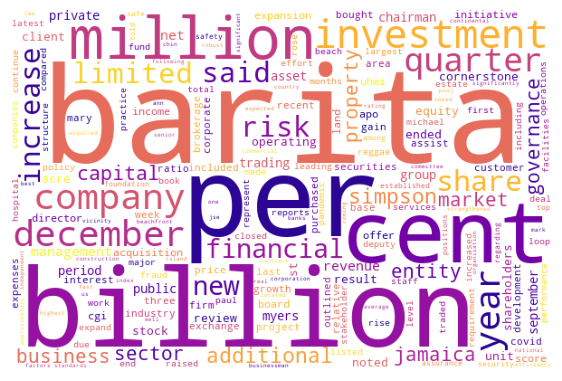

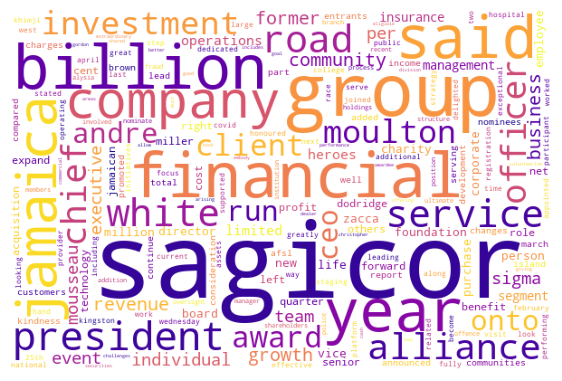

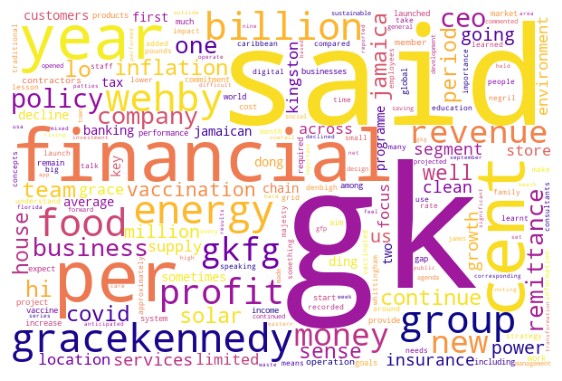

In [142]:
companies = list(set(df.Company))

for company in companies:
    gen_wordcloud(company)

In [21]:
def plot_sentiment(company):
    
    plt.style.use('ggplot')
    
    fig, ax = plt.subplots(figsize = (8, 5))
    sns.lineplot(data=df[df.Company==company], x="Date", y="Polarity")
    
    plt.title(f'{company} Sentiment', fontsize=15)
    plt.xticks(rotation=45)
    myFmt = mdates.DateFormatter('%b %Y') 
    ax.xaxis.set_major_formatter(myFmt)
    
    plt.savefig(f'images/{company}_sentiment_timeseries.png')

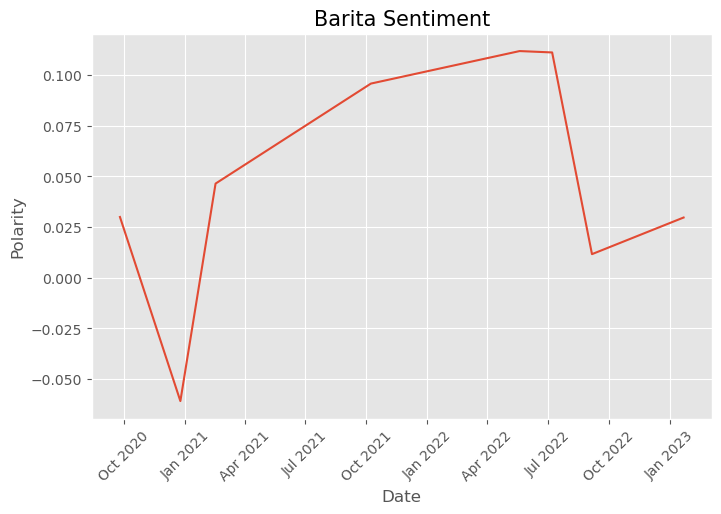

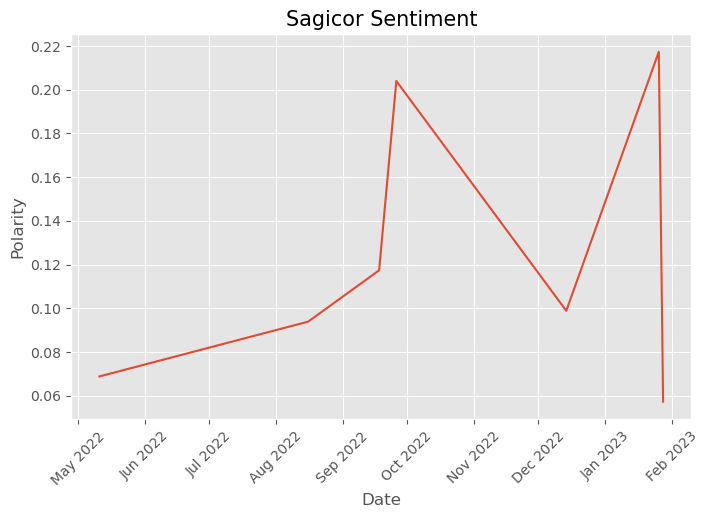

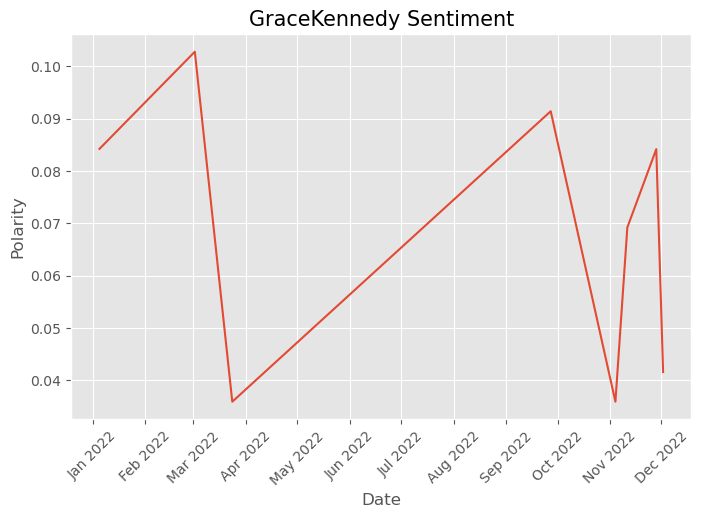

In [22]:
for company in companies:
    plot_sentiment(company)

In [23]:
df

,Company,Date,Link,Title,Text,Polarity,Sentiment_Type,text_tokenized,text_without_stopwords
0,Sagicor,2023-01-28,https://jamaica.loopnews.com/content/registrat...,registration closes february 1 for sagicor sig...,registration for the sagicor sigma 25th legacy...,0.057283,NEUTRAL,"[registration, for, the, sagicor, sigma, 25th,...","[registration, sagicor, sigma, 25th, legacy, r..."
1,Sagicor,2023-01-26,https://jamaica.loopnews.com/content/sagicor-f...,sagicor financial announces retirement of dodr...,sagicor financial company has announced that d...,0.217361,POSITIVE,"[sagicor, financial, company, has, announced, ...","[sagicor, financial, company, announced, dodri..."
2,Sagicor,2022-12-14,https://jamaica.loopnews.com/content/former-sa...,former sagicor vp slapped with fraud-related c...,former vice president of group marketing at sa...,0.098864,POSITIVE,"[former, vice, president, of, group, marketing...","[former, vice, president, group, marketing, sa..."
3,Sagicor,2022-09-26,https://jamaica.loopnews.com/content/sagicor-l...,sagicor launches community heroes awards,nominations for the sagicor foundation biennia...,0.203968,POSITIVE,"[nominations, for, the, sagicor, foundation, b...","[nominations, sagicor, foundation, biennial, c..."
4,Sagicor,2022-09-18,https://jamaica.loopnews.com/content/sagicor-r...,sagicor reorganises senior management structure,sagicor group jamaica has announced changes to...,0.117378,POSITIVE,"[sagicor, group, jamaica, has, announced, chan...","[sagicor, group, jamaica, announced, changes, ..."
5,Sagicor,2022-08-16,https://jamaica.loopnews.com/content/sagicor-n...,sagicor now holds client portfolio of alliance...,"sagicor group says its subsidiary, sagicor inv...",0.093899,POSITIVE,"[sagicor, group, says, its, subsidiary, sagico...","[sagicor, group, says, subsidiary, sagicor, in..."
6,Sagicor,2022-05-11,https://jamaica.loopnews.com/content/sagicors-...,sagicor's q1 earnings up 31%,large insurance provider sagicor group jamaica...,0.068849,NEUTRAL,"[large, insurance, provider, sagicor, group, j...","[large, insurance, provider, sagicor, group, j..."
7,GraceKennedy,2022-12-02,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy goes solar,the new hi-lo food stores (hi-lo) location in ...,0.041599,NEGATIVE,"[the, new, hi, lo, food, stores, hi, lo, locat...","[new, hi, lo, food, stores, hi, lo, location, ..."
8,GraceKennedy,2022-11-28,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy surpasses $100b revenue target se...,the gracekennedy group has posted revenues of ...,0.084202,NEUTRAL,"[the, gracekennedy, group, has, posted, revenu...","[gracekennedy, group, posted, revenues, 107, b..."
9,GraceKennedy,2022-11-11,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy profit down by one-quarter,the profit at gracekennedy limited (gk) declin...,0.069236,NEUTRAL,"[the, profit, at, gracekennedy, limited, gk, d...","[profit, gracekennedy, limited, gk, declined, ..."


In [57]:
score = df[['Company', 'Polarity']].groupby('Company').mean().reset_index()
score.columns=['Company', 'overallScore']
score['overallRating'] = ''
score.loc[score.overallScore>0.09,'overallRating'] = 'POSITIVE'
score.loc[(score.overallScore>=0.05) & (score.overallScore<=0.09), 'overallRating'] = 'NEUTRAL'
score.loc[score.overallScore<0.05,'overallRating'] = 'NEGATIVE'
score

,Company,overallScore,overallRating
0,Barita,0.046917,NEGATIVE
1,GraceKennedy,0.068175,NEUTRAL
2,Sagicor,0.122515,POSITIVE


In [58]:
df_final = df.merge(score, on='Company', how='left')
df_final.head()

,Company,Date,Link,Title,Text,Polarity,Sentiment_Type,text_tokenized,text_without_stopwords,overallScore,overallRating
0,Sagicor,2023-01-28,https://jamaica.loopnews.com/content/registrat...,registration closes february 1 for sagicor sig...,registration for the sagicor sigma 25th legacy...,0.057283,NEUTRAL,"[registration, for, the, sagicor, sigma, 25th,...","[registration, sagicor, sigma, 25th, legacy, r...",0.122515,POSITIVE
1,Sagicor,2023-01-26,https://jamaica.loopnews.com/content/sagicor-f...,sagicor financial announces retirement of dodr...,sagicor financial company has announced that d...,0.217361,POSITIVE,"[sagicor, financial, company, has, announced, ...","[sagicor, financial, company, announced, dodri...",0.122515,POSITIVE
2,Sagicor,2022-12-14,https://jamaica.loopnews.com/content/former-sa...,former sagicor vp slapped with fraud-related c...,former vice president of group marketing at sa...,0.098864,POSITIVE,"[former, vice, president, of, group, marketing...","[former, vice, president, group, marketing, sa...",0.122515,POSITIVE
3,Sagicor,2022-09-26,https://jamaica.loopnews.com/content/sagicor-l...,sagicor launches community heroes awards,nominations for the sagicor foundation biennia...,0.203968,POSITIVE,"[nominations, for, the, sagicor, foundation, b...","[nominations, sagicor, foundation, biennial, c...",0.122515,POSITIVE
4,Sagicor,2022-09-18,https://jamaica.loopnews.com/content/sagicor-r...,sagicor reorganises senior management structure,sagicor group jamaica has announced changes to...,0.117378,POSITIVE,"[sagicor, group, jamaica, has, announced, chan...","[sagicor, group, jamaica, announced, changes, ...",0.122515,POSITIVE


## Converting to Json 

In [67]:
df_overall = df_final[['Company', 'overallScore', 'overallRating']]
df_overall = df_overall[~df_overall.duplicated()]

df_details = df_final[['Company', 'Date', 'Polarity', 'Sentiment_Type', 'Title', 'Link', 'Text']]

In [68]:
json_overall = df_overall.to_json(orient='records')
json_overall

'[{"Company":"Sagicor","overallScore":0.1225146259,"overallRating":"POSITIVE"},{"Company":"GraceKennedy","overallScore":0.0681751078,"overallRating":"NEUTRAL"},{"Company":"Barita","overallScore":0.0469173467,"overallRating":"NEGATIVE"}]'

In [132]:
df_details['Date'] = [str(day) for day in df_details['Date']]

df_sagicor = df_details[df_details.Company=='Sagicor']
df_barita = df_details[df_details.Company=='Barita']
df_gk = df_details[df_details.Company=='GraceKennedy']

sag = dict()
lst = []
for i in range(len(df_sagicor)):
    {'name': 'Sagicor', 
     'companyAnalysis': lst.append(dict(df_sagicor.iloc[i, 1:]))}

sag


/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_20365/3213054921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_details['Date'] = [str(day) for day in df_details['Date']]


{}

In [133]:
df_sagicor = df_details[df_details.Company=='Sagicor']

sag = []
for i in range(len(df_sagicor)):
    dct = dict(df_sagicor.iloc[i, 1:])
    sag.append(dct)
    
sag_json = {'company': 'Sagicor', 'companyAnalysis': sag}
sag_json

{'company': 'Sagicor',
 'companyAnalysis': [{'Date': '2023-01-28 00:00:00',
   'Polarity': 0.05728311688311688,
   'Sentiment_Type': 'NEUTRAL',
   'Title': 'registration closes february 1 for sagicor sigma 25th legacy run',
   'Link': 'https://jamaica.loopnews.com/content/registration-closes-february-1-sagicor-sigma-25th-legacy-run',
   'Text': 'registration for the sagicor sigma 25th legacy run full in-person charity road race closes on wednesday, february 1.\n\ncelebrating its 25th staging, the sagicor sigma corporate run has announced that it is returning to a fully in-person event after two years of scaled-down events due to the covid-19 pandemic.\n\nscheduled for sunday, february 12 in new kingston, the charity run/walk event is aiming to raise $75 million for its 2023 beneficiaries – the paediatric ward at the university hospital of the west indies and the edna manley college of the visual and performing arts.\n\nregistration per individual is $2500, while college and high school

In [134]:
gk = []
for i in range(len(df_gk)):
    dct = dict(df_gk.iloc[i, 1:])
    gk.append(dct)
    
gk_json = {'company': 'GraceKennedy', 'companyAnalysis': gk}
gk_json

{'company': 'GraceKennedy',
 'companyAnalysis': [{'Date': '2022-12-02 00:00:00',
   'Polarity': 0.04159939159939161,
   'Sentiment_Type': 'NEGATIVE',
   'Title': 'gracekennedy goes solar',
   'Link': 'https://jamaica.loopnews.com/content/gracekennedy-goes-solarr',
   'Text': 'the new hi-lo food stores (hi-lo) location in negril, westmoreland, and the grace agro-processors (gap) plant in denbigh, clarendon are the latest facilities in the gracekennedy (gk) group to ‘go solar’.\n\nboth locations have installed solar power grid-tied systems with a combined generating capacity of 925 kwh per day, which are projected to meet approximately 50 – 60 per cent of the energy needs at the new hi-lo location and up to 50 per cent of the energy needs at gap denbigh.\n\nsolar grid-tied systems use solar panels and inverters for power generation. they do not require batteries to store power for night-time use and are connected to the electrical power grid.\n\n“the pivot towards solar energy is embedde

In [135]:
barita = []
for i in range(len(df_barita)):
    dct = dict(df_barita.iloc[i, 1:])
    barita.append(dct)
    
barita_json = {'company': 'Barita', 'companyAnalysis': barita}
barita_json

{'company': 'Barita',
 'companyAnalysis': [{'Date': '2023-01-22 00:00:00',
   'Polarity': 0.029662698412698408,
   'Sentiment_Type': 'NEGATIVE',
   'Title': 'barita assures clients security of their investment is top priority',
   'Link': 'https://jamaica.loopnews.com/content/barita-assures-clients-security-their-investment-top-priorityy',
   'Text': 'leading investment and brokerage firm, barita and its board of directors have moved to "unreservedly assure" its customers that the safety and security of their funds is the entity\'s top priority.\n\nbarita gave the assurance in a letter sent on sunday to its clients which has been obtained by loop news.\n\nthe assurance follows the fraud scandal which has rocked stocks and securities limited (ssl), which has generated unease in sections of the financial sector in jamaica.\n\nbarita told its clients that it\'s writing to address recent media reports regarding alleged financial fraud in the industry. the entity noted that the news has und

In [136]:
lst_final = [barita_json, sag_json, gk_json]

In [138]:
import json
fin = json.dumps(lst_final)

In [140]:
with open("json_file.json", "w") as write_file:
    json.dump(fin, write_file)

In [122]:
barita_json.update(sag_json)
barita_json.update(gk_json)


In [124]:
barita_json['company']

'GraceKennedy'

In [116]:
final = [sag_json, gk_json, barita_json]

with open("json_file", "w") as fp:
    json.dump(final,fp) 

TypeError: unhashable type: 'list'

In [80]:
lst = []
for i in range(len(df_details)):
    dct = dict(df_details.iloc[i, 1:])
    lst.append(dct)
    
lst
    
#dict(df_details.iloc[0, 1:])

[{'Date': Timestamp('2023-01-28 00:00:00'),
  'Polarity': 0.05728311688311688,
  'Sentiment_Type': 'NEUTRAL',
  'Title': 'registration closes february 1 for sagicor sigma 25th legacy run',
  'Link': 'https://jamaica.loopnews.com/content/registration-closes-february-1-sagicor-sigma-25th-legacy-run',
  'Text': 'registration for the sagicor sigma 25th legacy run full in-person charity road race closes on wednesday, february 1.\n\ncelebrating its 25th staging, the sagicor sigma corporate run has announced that it is returning to a fully in-person event after two years of scaled-down events due to the covid-19 pandemic.\n\nscheduled for sunday, february 12 in new kingston, the charity run/walk event is aiming to raise $75 million for its 2023 beneficiaries – the paediatric ward at the university hospital of the west indies and the edna manley college of the visual and performing arts.\n\nregistration per individual is $2500, while college and high school students are $1500. group rates vary

In [69]:
df_details.to_json(orient='records')

'[{"Company":"Sagicor","Date":1674864000000,"Polarity":0.0572831169,"Sentiment_Type":"NEUTRAL","Title":"registration closes february 1 for sagicor sigma 25th legacy run","Link":"https:\\/\\/jamaica.loopnews.com\\/content\\/registration-closes-february-1-sagicor-sigma-25th-legacy-run","Text":"registration for the sagicor sigma 25th legacy run full in-person charity road race closes on wednesday, february 1.\\n\\ncelebrating its 25th staging, the sagicor sigma corporate run has announced that it is returning to a fully in-person event after two years of scaled-down events due to the covid-19 pandemic.\\n\\nscheduled for sunday, february 12 in new kingston, the charity run\\/walk event is aiming to raise $75 million for its 2023 beneficiaries \\u2013 the paediatric ward at the university hospital of the west indies and the edna manley college of the visual and performing arts.\\n\\nregistration per individual is $2500, while college and high school students are $1500. group rates vary \\u

In [46]:
test = df.to_json(orient='records')

In [ ]:
 {
   name: "Sagicor"
   overallAnalysis: 0.5
   overalRating: Positive
   companyAnalysis: [
       {
            date: 
        analysis: -2
            rating: negative
        title: 
        link:
            text: 
      },

In [47]:
test

'[{"Company":"Sagicor","Date":1674864000000,"Link":"https:\\/\\/jamaica.loopnews.com\\/content\\/registration-closes-february-1-sagicor-sigma-25th-legacy-run","Title":"registration closes february 1 for sagicor sigma 25th legacy run","Text":"registration for the sagicor sigma 25th legacy run full in-person charity road race closes on wednesday, february 1.\\n\\ncelebrating its 25th staging, the sagicor sigma corporate run has announced that it is returning to a fully in-person event after two years of scaled-down events due to the covid-19 pandemic.\\n\\nscheduled for sunday, february 12 in new kingston, the charity run\\/walk event is aiming to raise $75 million for its 2023 beneficiaries \\u2013 the paediatric ward at the university hospital of the west indies and the edna manley college of the visual and performing arts.\\n\\nregistration per individual is $2500, while college and high school students are $1500. group rates vary \\u2013 large corporate teams cost $250,000 for up to 

In [40]:
df.head()

,Company,Date,Link,Title,Text,Polarity,Sentiment_Type,text_tokenized,text_without_stopwords
0,Sagicor,2023-01-28,https://jamaica.loopnews.com/content/registrat...,registration closes february 1 for sagicor sig...,registration for the sagicor sigma 25th legacy...,0.057283,NEUTRAL,"[registration, for, the, sagicor, sigma, 25th,...","[registration, sagicor, sigma, 25th, legacy, r..."
1,Sagicor,2023-01-26,https://jamaica.loopnews.com/content/sagicor-f...,sagicor financial announces retirement of dodr...,sagicor financial company has announced that d...,0.217361,POSITIVE,"[sagicor, financial, company, has, announced, ...","[sagicor, financial, company, announced, dodri..."
2,Sagicor,2022-12-14,https://jamaica.loopnews.com/content/former-sa...,former sagicor vp slapped with fraud-related c...,former vice president of group marketing at sa...,0.098864,POSITIVE,"[former, vice, president, of, group, marketing...","[former, vice, president, group, marketing, sa..."
3,Sagicor,2022-09-26,https://jamaica.loopnews.com/content/sagicor-l...,sagicor launches community heroes awards,nominations for the sagicor foundation biennia...,0.203968,POSITIVE,"[nominations, for, the, sagicor, foundation, b...","[nominations, sagicor, foundation, biennial, c..."
4,Sagicor,2022-09-18,https://jamaica.loopnews.com/content/sagicor-r...,sagicor reorganises senior management structure,sagicor group jamaica has announced changes to...,0.117378,POSITIVE,"[sagicor, group, jamaica, has, announced, chan...","[sagicor, group, jamaica, announced, changes, ..."
